In [11]:
from scipy.io import loadmat
import os, math, scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
directory = 'data/Data/F1/mat'
counter = 1
UL_df, LL_df, JW_df, TD_df, TB_df, TT_df = [], [], [], [], [], []

for filename in sorted(os.listdir(directory)):
    if filename.endswith('.mat'):
        f = os.path.join(directory, filename)
        mat = scipy.io.loadmat(f)
        # takes the data that is stored at the key that precedes the data for each .mat file
        data = mat['usctimit_ema_f1_{:03}_{:03}'.format(counter, counter + 4)]
        counter += 5

        # make dataframes of the six positions
        UL_df.append(pd.DataFrame.from_dict(data[0][1][2]))
        LL_df.append(pd.DataFrame.from_dict(data[0][2][2]))
        JW_df.append(pd.DataFrame.from_dict(data[0][3][2]))
        TD_df.append(pd.DataFrame.from_dict(data[0][4][2]))
        TB_df.append(pd.DataFrame.from_dict(data[0][5][2]))
        TT_df.append(pd.DataFrame.from_dict(data[0][6][2]))

In [14]:
frames = {}
word_number = 0

with open('timestamps.txt', 'r') as file:
    timestamps = file.read().splitlines()
    for line in timestamps:
        split_line = line.split(',')
        sent_number = int(split_line[-1])
        
        # find start and end by multiplying the timestamps with the sampling rate
        starting_point = math.floor(float(split_line[2]) * get_srate(int(split_line[0])))
        end_point = math.ceil(float(split_line[3]) * get_srate(int(split_line[0])))
        
        # make dataframe for each word, so 3481 dataframes
        data = {'word' : [split_line[1]],
                'srate': [get_srate(int(split_line[0]))],
                'sent' : [int(split_line[-1])],
                'UL'   : [get_pos_list('UL', int(split_line[0]), starting_point, end_point)],
                'LL'   : [get_pos_list('LL', int(split_line[0]), starting_point, end_point)],
                'JW'   : [get_pos_list('JW', int(split_line[0]), starting_point, end_point)],
                'TD'   : [get_pos_list('TD', int(split_line[0]), starting_point, end_point)],
                'TB'   : [get_pos_list('TB', int(split_line[0]), starting_point, end_point)],
                'TT'   : [get_pos_list('TT', int(split_line[0]), starting_point, end_point)]}
        
        df = pd.DataFrame(data)
        frames[word_number] = df
        word_number += 1

KeyError: 2450

In [9]:
def get_srate(file_number):
    directory = 'data/Data/F1/mat'
    
    # still needs to ignore the .DS_Store file in a better way
    file = sorted(os.listdir(directory))[file_number + 1]
    
    f = os.path.join(directory, file)
    mat = scipy.io.loadmat(f)['usctimit_ema_f1_{:03}_{:03}'.format(file_number*5 + 1, file_number*5 + 5)]
    
    #returns the srate which is stored here
    return mat[0][1][1][0][0]

In [8]:
def get_pos_list(position, file_number, starting_point, end_point):
    xyz_list = []

    if position == 'UL':
        for i in range(end_point - starting_point):
            coordinate = (UL_df[file_number][0][starting_point + i],
                          UL_df[file_number][1][starting_point + i],
                          UL_df[file_number][2][starting_point + i])

            xyz_list.append(coordinate)
            
    if position == 'LL':
        for i in range(end_point - starting_point):
            coordinate = (LL_df[file_number][0][starting_point + i],
                          LL_df[file_number][1][starting_point + i],
                          LL_df[file_number][2][starting_point + i])

            xyz_list.append(coordinate)
            
    if position == 'JW':
        for i in range(end_point - starting_point):
            coordinate = (JW_df[file_number][0][starting_point + i],
                          JW_df[file_number][1][starting_point + i],
                          JW_df[file_number][2][starting_point + i])

            xyz_list.append(coordinate)
            
    if position == 'TB':
        for i in range(end_point - starting_point):
            coordinate = (TB_df[file_number][0][starting_point + i],
                          TB_df[file_number][1][starting_point + i],
                          TB_df[file_number][2][starting_point + i])

            xyz_list.append(coordinate)
            
    if position == 'TD':
        for i in range(end_point - starting_point):
            coordinate = (TD_df[file_number][0][starting_point + i],
                          TD_df[file_number][1][starting_point + i],
                          TD_df[file_number][2][starting_point + i])

            xyz_list.append(coordinate)
            
    if position == 'TT':
        for i in range(end_point - starting_point):
            coordinate = (TT_df[file_number][0][starting_point + i],
                          TT_df[file_number][1][starting_point + i],
                          TT_df[file_number][2][starting_point + i])

            xyz_list.append(coordinate)
        
    return xyz_list

<IPython.core.display.Javascript object>


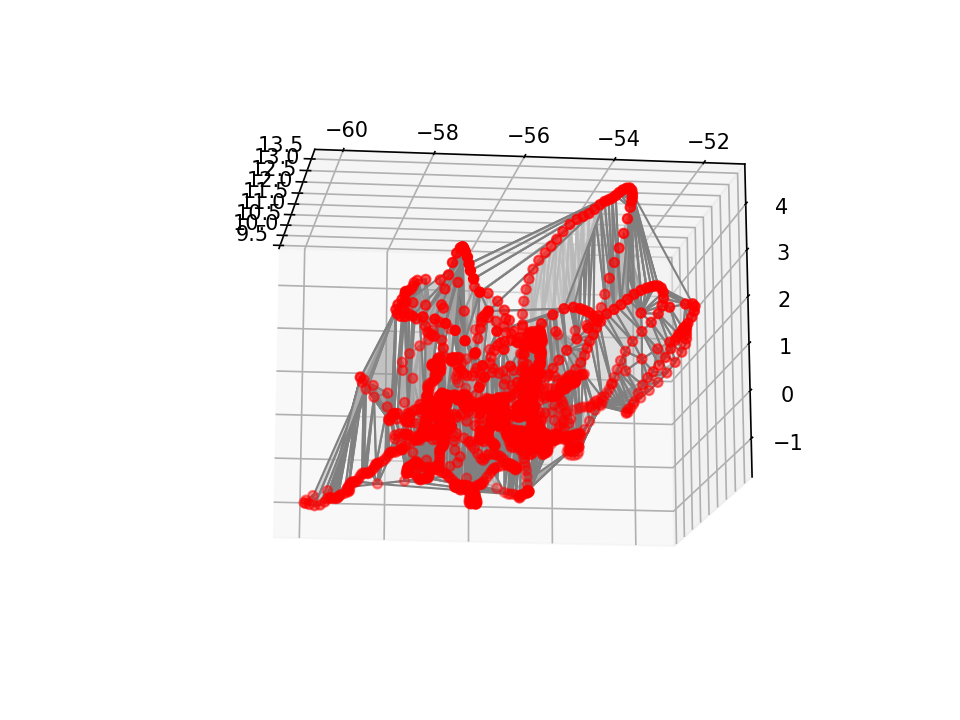

In [8]:
# plot the movement of the upper lip
# each row represents one point, so the plot indicates the movement among all three coordinates

%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(ul_df[0], ul_df[1], ul_df[2], color='white', edgecolors='grey', alpha=0.5)
ax.scatter(ul_df[0], ul_df[1], ul_df[2], c='red')
plt.show()